In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
#!/usr/bin/python

import csv
import sys
import pandas as pd
import matplotlib.pyplot as plt

def parse(experiment, data):
  if len(experiment) <= 0:
    return
  sub_title = experiment[0][0]
  num = len(experiment[0]) - 3
  for row in experiment[1:]:
    if sub_title not in data.keys():
      data[sub_title] = {}
    data[sub_title][row[0]] = map(float, row[1:num + 1])
    
def draw(data, name, ylabel, ylabel2=None):
  exp = []
  res = {}
  order = ['No PrivacyGuard', 'PrivacyGuard (no filter)', 'PrivacyGuard (sync filter)', 'PrivacyGuard (async filter)']
  keyOrder = ['Download', 'Upload']
  if len(data.keys()) == 3:
    keyOrder.append('Ping')

  for key1 in keyOrder:
    exp += [key1] * 10
    if res == {}:
        res = data[key1]
    else:
        for key in res:
            res[key] += data[key1][key]
  ix = pd.MultiIndex.from_arrays([exp], names=[name])
  dx = pd.DataFrame(res, index=ix, columns=order)
  print ix, dx
  gp = dx.groupby(level=(name))
  means = gp.mean()
  errors = gp.std()
  fig, ax = plt.subplots()
  ax.set_ylabel(ylabel)
  ax.yaxis.label.set_size(15)
  if ylabel2 != None:
    ax2 = ax.twinx()
    ax2.set_ylabel(ylabel2)
    ax2.yaxis.label.set_size(15)
    ax2.set_ylim(0, 35)
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=15)
  return means.plot(yerr=errors, ax=ax, kind='bar', rot=0)

def drawFromFile(inputFile, name, ylabel, ylabel2=None):
  data = {}
  with open(inputFile, 'rb') as csvFile:
    reader = csv.reader(csvFile, delimiter = ',')
    experiment = []
    for row in reader:
      if row[0] == '':
        parse(experiment, data)
        experiment = []
      elif row[1] == '':
        main_title = row[0]
      else:
        experiment.append(row)
  draw(data, name, ylabel, ylabel2).get_figure().savefig(name + ".pdf")

In [7]:
drawFromFile('/home/uhengart/research/frank/thesis/performance/result/network/10Mbytes-Table 1.csv', 'Download and Upload 10Mbytes File', 'Delay(ms)')

Index([u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload'], dtype='object')                                    No PrivacyGuard  PrivacyGuard (no filter)  \
Download and Upload 10Mbytes File                                              
Download                                      4804                      6115   
Download                                      4871                      5116   
Download                                      5707                      5218   
Download                                      5675                      7046   
Download                                      5920                      5721   
Download                                      5672                      6751   
Download                                      5688                      4797   
Download        

Index([u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Ping', u'Ping', u'Ping', u'Ping', u'Ping', u'Ping', u'Ping', u'Ping', u'Ping', u'Ping'], dtype='object')                                  No PrivacyGuard  PrivacyGuard (no filter)  \
Test with SpeedTest Application                                              
Download                                   17.39                     17.11   
Download                                   19.35                     18.41   
Download                                   16.92                     15.62   
Download                                   17.72                     17.65   
Download                                   18.29                     16.58   
Download                                   20.21                     19.07   
Download              

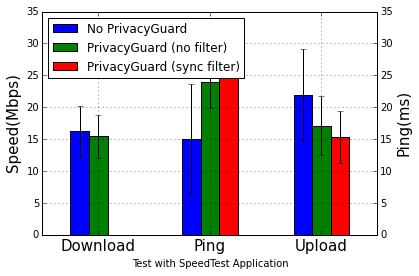

In [9]:
drawFromFile('/home/uhengart/research/frank/thesis/performance/result/network/SpeedTest-Table 1.csv', 'Test with SpeedTest Application', 'Speed(Mbps)', 
             'Ping(ms)')

Index([u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Download', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload', u'Upload'], dtype='object')                                   No PrivacyGuard  PrivacyGuard (no filter)  \
Download and Upload 1Mbytes File                                              
Download                                      563                       640   
Download                                      756                       515   
Download                                      539                       680   
Download                                      569                       625   
Download                                      838                       742   
Download                                      891                       750   
Download                                     1224                      1213   
Download                 

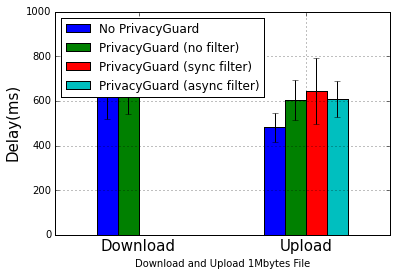

In [8]:
drawFromFile('/home/uhengart/research/frank/thesis/performance/result/network/1Mbytes-Table 1.csv', 'Download and Upload 1Mbytes File', 'Delay(ms)')